Класс автокодировщика

In [ ]:
class AftNet34(torch.nn.Module):
    def __init__(self):
        super(AftNet34,self).__init__()
        #Сначал идет энкодер с конволюциями и батч-нормализацией:
        self.bn1=torch.nn.BatchNorm2d(num_features=1)
        self.conv1=torch.nn.Conv2d(1,32,3,1,1)
        self.act1=torch.nn.LeakyReLU(0.01)
        self.bn2=torch.nn.BatchNorm2d(num_features=32)
        self.conv2=torch.nn.Conv2d(32,32,3,1,1)
        self.act2=torch.nn.LeakyReLU(0.01)
        self.pool1=torch.nn.AvgPool2d(2,2)
        self.out1=torch.nn.Dropout2d(p=0.2)

        self.bn3=torch.nn.BatchNorm2d(num_features=32)
        self.conv3=torch.nn.Conv2d(32,64,3,1,1)
        self.act3=torch.nn.LeakyReLU(0.01)
        self.bn4=torch.nn.BatchNorm2d(num_features=64)
        self.conv4=torch.nn.Conv2d(64,64,3,1,1)
        self.act4=torch.nn.LeakyReLU(0.01)
        self.pool2=torch.nn.AvgPool2d(2,2)
        self.out2=torch.nn.Dropout2d(p=0.2)

        self.bn5=torch.nn.BatchNorm2d(num_features=64)
        self.conv5=torch.nn.Conv2d(64,128,3,1,1)
        self.act5=torch.nn.LeakyReLU(0.01)
        self.bn6=torch.nn.BatchNorm2d(num_features=128)
        self.conv6=torch.nn.Conv2d(128,128,3,1,1)
        self.act6=torch.nn.LeakyReLU(0.01)
        self.pool3=torch.nn.AvgPool2d(2,2)
        self.out3=torch.nn.Dropout2d(p=0.2)

        self.bn7=torch.nn.BatchNorm2d(num_features=128)
        self.conv7=torch.nn.Conv2d(128,128,3,1,1)
        self.act7=torch.nn.LeakyReLU(0.01)
        self.bn8=torch.nn.BatchNorm2d(num_features=128)
        self.conv8=torch.nn.Conv2d(128,128,3,1,1)
        self.act8=torch.nn.LeakyReLU(0.01)
        self.pool4=torch.nn.AvgPool2d(2,2)
        self.out4=torch.nn.Dropout2d(p=0.2)
        # DENSE- слои
        self.fc1=torch.nn.Linear(128,64)
        self.fact1=torch.nn.ReLU()
        self.fact2=torch.nn.ReLU()
        self.fc11=torch.nn.Linear(64,9)
        self.fc12=torch.nn.Linear(64,9)







        # далее декодер фактически операция обратная энкодеру (в моем случае симметрично):


        self.dbn1=torch.nn.BatchNorm2d(num_features=1)
        self.deconv1=torch.nn.Conv2d(1,64,3,1,1)
        self.deact1=torch.nn.LeakyReLU(0.01)
        self.dbn2=torch.nn.BatchNorm2d(num_features=64)
        self.deconv2=torch.nn.Conv2d(64,64,3,1,1)
        self.deact2=torch.nn.LeakyReLU(0.01)
        self.unpool1=torch.nn.UpsamplingBilinear2d(scale_factor=2)

        self.dbn3=torch.nn.BatchNorm2d(num_features=64)
        self.deconv3=torch.nn.Conv2d(64,128,3,1,1)
        self.deact3=torch.nn.LeakyReLU(0.01)
        self.dbn4=torch.nn.BatchNorm2d(num_features=128)
        self.deconv4=torch.nn.Conv2d(128,128,3,1,1)
        self.deact4=torch.nn.LeakyReLU(0.01)
        self.unpool2=torch.nn.UpsamplingBilinear2d(scale_factor=2)

        self.dbn5=torch.nn.BatchNorm2d(num_features=128)
        self.deconv5=torch.nn.Conv2d(128,256,3,1,1)
        self.deact5=torch.nn.LeakyReLU(0.01)
        self.dbn6=torch.nn.BatchNorm2d(num_features=256)
        self.deconv6=torch.nn.Conv2d(256,256,3,1,1)
        self.deact6=torch.nn.LeakyReLU(0.01)
        self.unpool3=torch.nn.UpsamplingBilinear2d(scale_factor=2)
        self.transpose1=torch.nn.ConvTranspose2d(256,256,3,1)
        self.transpose2=torch.nn.ConvTranspose2d(256,1,3,1)

















    def encoder(self,x):
        x=self.bn1(x)
        x=self.conv1(x)
        x=self.act1(x)
        x=self.bn2(x)
        x=self.conv2(x)
        x=self.act2(x)
        x=self.pool1(x)
        x=self.out1(x)

        x=self.bn3(x)
        x=self.conv3(x)
        x=self.act3(x)
        x=self.bn4(x)
        x=self.conv4(x)
        x=self.act4(x)
        x=self.pool2(x)
        x=self.out2(x)

        x=self.bn5(x)
        x=self.conv5(x)
        x=self.act5(x)
        x=self.bn6(x)
        x=self.conv6(x)
        x=self.act6(x)
        x=self.pool3(x)
        x=self.out3(x)

        x=self.bn7(x)
        x=self.conv7(x)
        x=self.act7(x)
        x=self.bn8(x)
        x=self.conv8(x)
        x=self.act8(x)
        x=self.pool4(x)
        x=self.out4(x)
        x=x.view(x.size(0),x.size(1)*x.size(2)*x.size(3))

        return x
    def decoder(self,x):
        x=x.view(x.size(0),1,3,3)
        x=self.dbn1(x)
        x=self.deconv1(x)
        x=self.deact1(x)
        x=self.dbn2(x)
        x=self.deconv2(x)
        x=self.deact2(x)
        x=self.unpool1(x)

        x=self.dbn3(x)
        x=self.deconv3(x)
        x=self.deact3(x)
        x=self.dbn4(x)
        x=self.deconv4(x)
        x=self.deact4(x)
        x=self.unpool2(x)

        x=self.dbn5(x)
        x=self.deconv5(x)
        x=self.deact5(x)
        x=self.dbn6(x)
        x=self.deconv6(x)
        x=self.deact6(x)
        x=self.unpool3(x)
        x=self.transpose1(x)
        x=self.transpose2(x)
        return x
    def dense(self,x):
        x=self.fc1(x)
        x=self.fact1(x)
        mu=self.fact2(self.fc11(x))
        log_var=self.fact2(self.fc12(x))
        return mu, log_var
    def reparametrize(self, mu, log_var):
        std = log_var.mul(0.5).exp_()
        if torch.cuda.is_available():
            eps = FloatTensor(std.size()).normal_().to(device)
        else:
            eps = torch.FloatTensor(std.size()).normal_()
        return eps.mul(std).add_(mu)

    def forward(self,x):
        mu,log_var=self.dense(self.encoder(x))
        x=self.decoder(self.reparametrize(*self.dense(self.encoder(x))))
        return x,mu,log_var


Все нужные импорты

In [ ]:
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
from skimage.io import imread,imshow
import os
from torchvision import transforms, models
from tqdm import tqdm

Работа с данными:
загрузка датасетов

In [ ]:
'''
train_dir='/content/gdrive/My Drive/обвыб1'
val_dir='/content/gdrive/My Drive/валвыб1'
'''
train_transforms = transforms.Compose([transforms.Resize((28, 28)),
transforms.ToTensor(), transforms.Normalize((0.1307),(0.3081)),
])

val_transforms = transforms.Compose([
    transforms.Resize((28, 28)) ,
    transforms.ToTensor(), transforms.Normalize((0.1307),(0.3081))

])


'''

train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

'''
batch_size = 100
train_dataloader = torch.utils.data.DataLoader(
torchvision.datasets.MNIST(root='/content/',train=True,transform=train_transforms,download=True), batch_size=batch_size, shuffle=True)
batch_size = 100
val_dataloader = torch.utils.data.DataLoader(
torchvision.datasets.MNIST(root='/content/',train=False,transform=val_transforms), batch_size=batch_size, shuffle=False)

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw


Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Проверка данных

In [ ]:
class_names=['X','O']
std,mean=0.1307,0.3081
'''
def show_input(input_tensor, title=''):
    image = input_tensor.view(28,28).numpy()*std+mean
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()
    plt.pause(0.001)


X_batch, y_batch = next(iter(train_dataloader))

show_input(X_batch[5], title='2')
'''


"\ndef show_input(input_tensor, title=''):\n    image = input_tensor.view(28,28).numpy()*std+mean\n    plt.imshow(image.clip(0, 1))\n    plt.title(title)\n    plt.show()\n    plt.pause(0.001)\n\n\nX_batch, y_batch = next(iter(train_dataloader))\n\nshow_input(X_batch[5], title='2')\n"

функция тренировки

In [ ]:


def loss_function(recon_x, x, mu, logvar,loss):
    """
    recon_x: generating images
    x: origin images
    mu: latent mean
    logvar: latent log variance
    """
    BCE = loss(recon_x, x)  # mse loss
    # loss = 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD_element = mu.pow(2).add_(logvar.exp()).mul_(-1).add_(1).add_(logvar)
    KLD = torch.sum(KLD_element).mul_(-0.5)
    # KL divergence
    return BCE + KLD

def train_model(model, loss, optimizer, num_epochs):
    for epoch in range(num_epochs):
        print('Epoch {}/{}:'.format(epoch, num_epochs - 1), flush=True)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                dataloader = train_dataloader
                model.train()  # Set model to training mode
            else:
                dataloader = val_dataloader
                model.eval()   # Set model to evaluate mode

            running_loss = 0.
            running_acc = 0.

            # Iterate over data.
            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)

                #labels = labels.to(device)

                optimizer.zero_grad()

                # forward and backward
                with torch.set_grad_enabled(phase == 'train'):
                    recon_batch, mu, logvar = model(inputs)
                    loss_value = loss_function(recon_batch, inputs, mu, logvar,loss)



                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss_value.backward()
                        optimizer.step()

                # statistics
                running_loss += loss_value.item()
                #running_acc += (preds==inputs.data).float().mean()


            epoch_loss = running_loss / len(dataloader)
            #epoch_acc = running_acc / len(dataloader)

            print('{} Loss: {:.4f} '.format(phase, epoch_loss), flush=True)


Объявление модели

In [ ]:
Set=AftNet34()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
Set=Set.to(device)

Объявление лосса и оптимизатора

In [ ]:
loss= torch.nn.MSELoss()
optim=torch.optim.Adam(Set.parameters(),lr=3e-4,amsgrad=True)

Тренировка

In [ ]:
train_model(Set,loss,optim,1)

Epoch 0/0:


100%|██████████| 600/600 [51:39<00:00,  5.17s/it]

train Loss: 0.9557 



100%|██████████| 100/100 [02:41<00:00,  1.62s/it]

val Loss: 0.7323 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


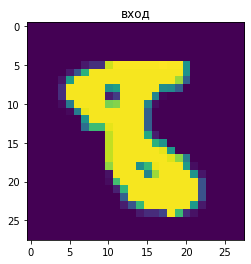

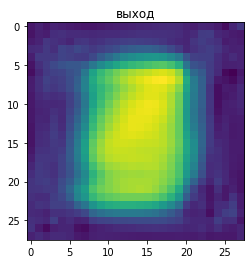

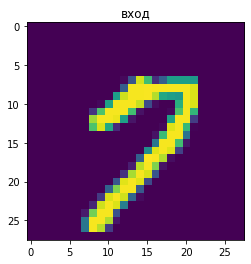

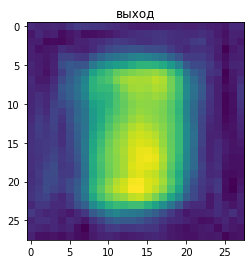

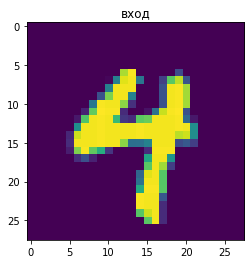

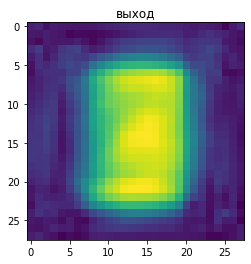

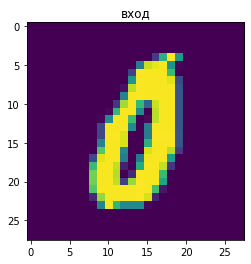

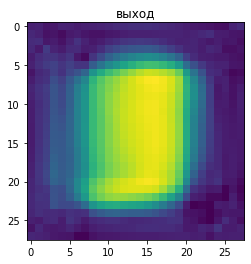

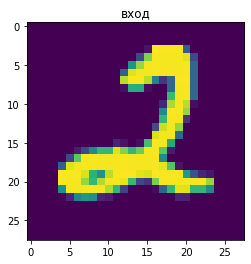

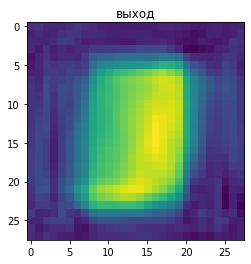

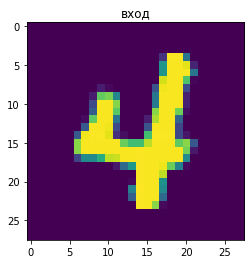

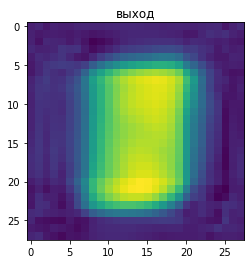

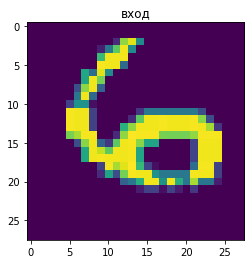

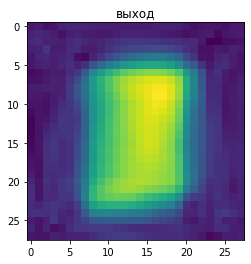

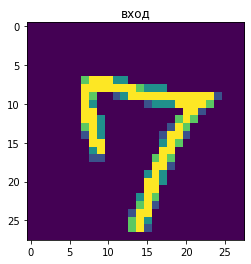

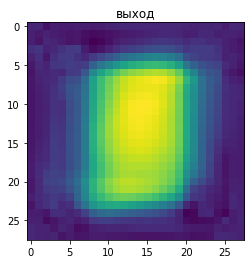

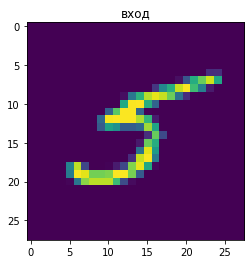

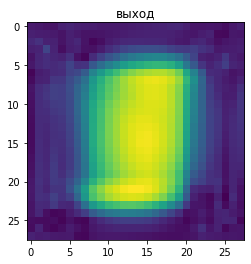

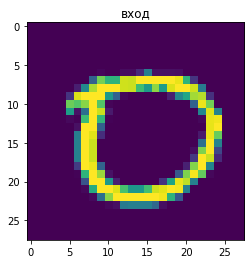

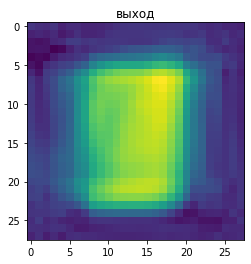

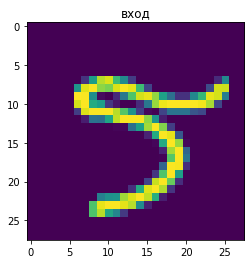

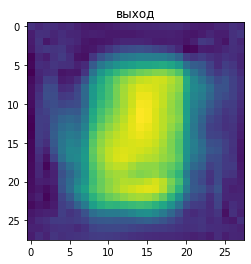

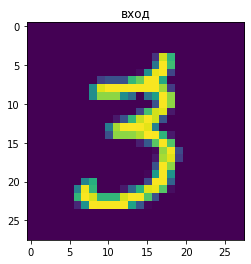

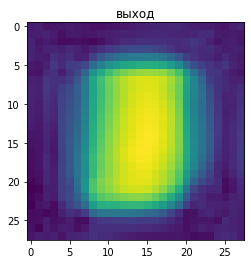

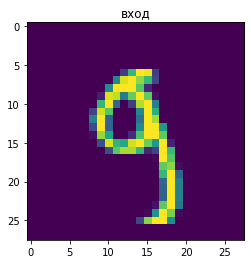

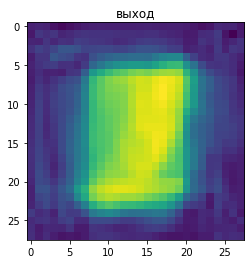

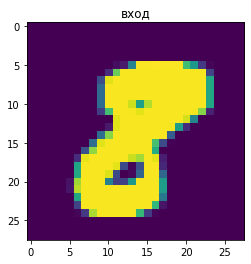

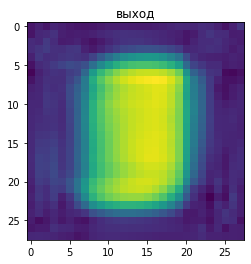

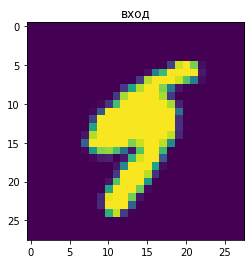

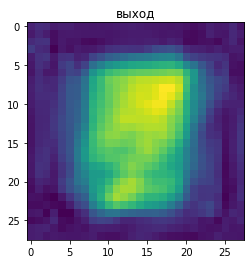

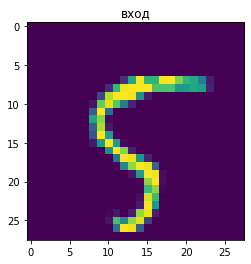

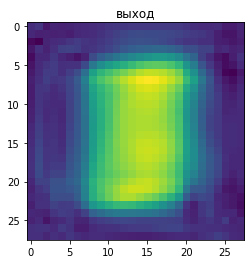

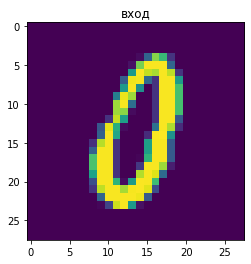

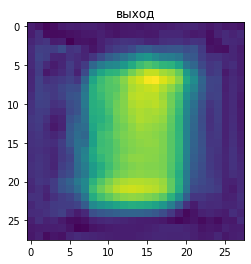

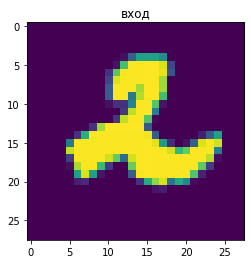

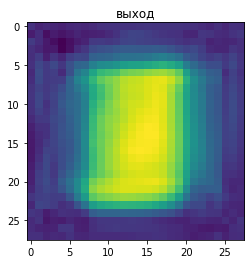

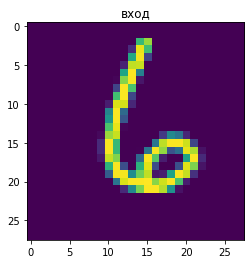

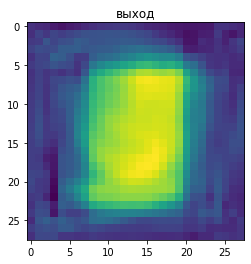

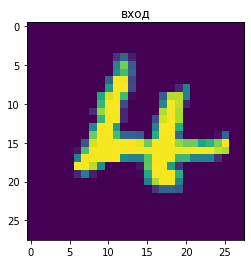

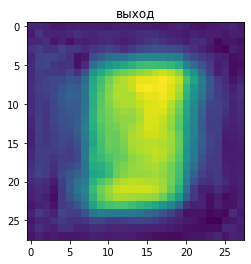

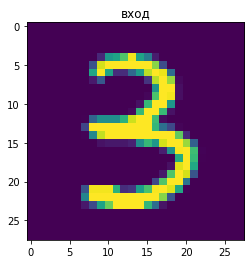

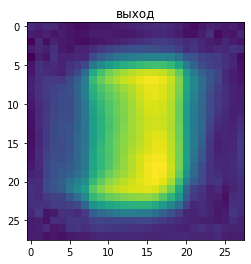

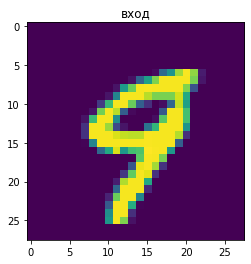

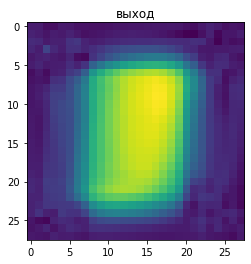

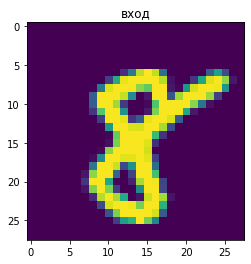

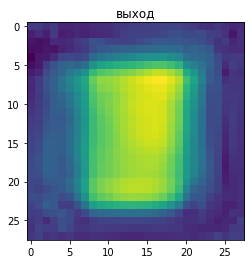

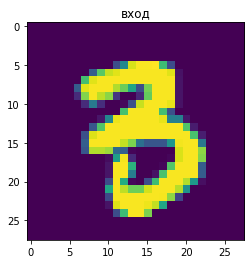

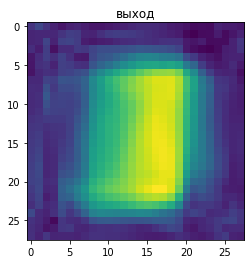

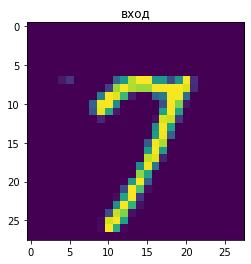

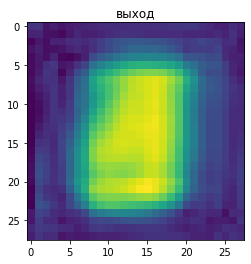

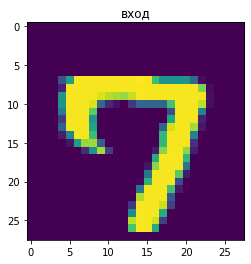

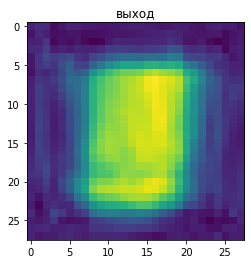

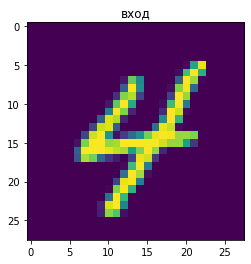

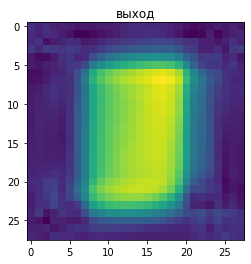

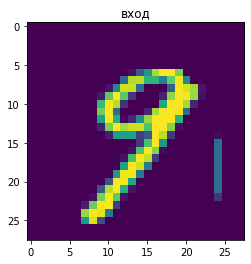

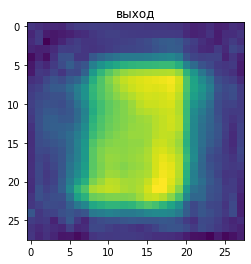

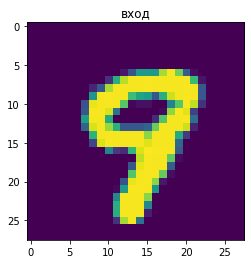

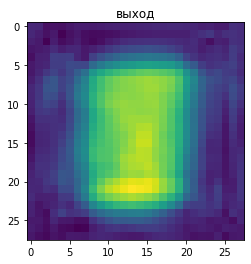

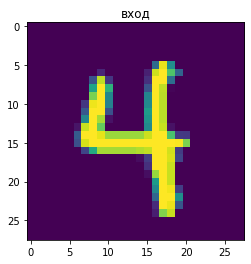

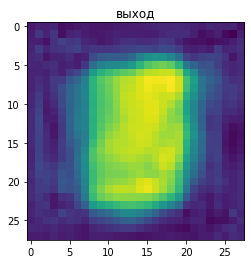

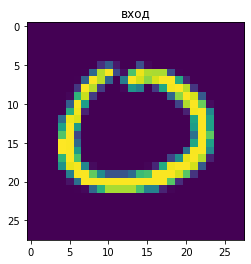

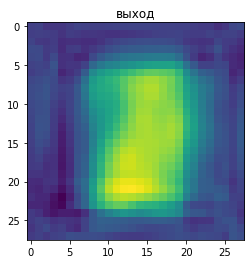

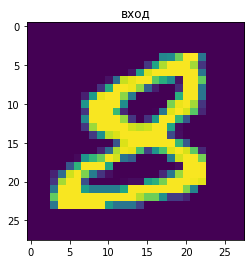

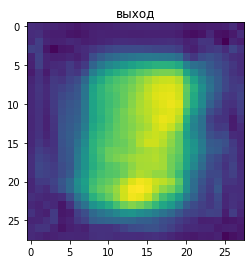

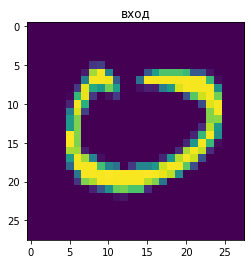

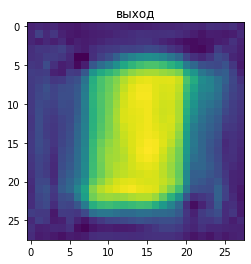

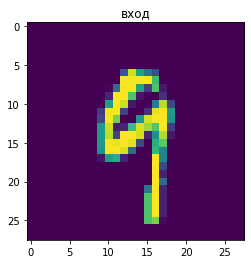

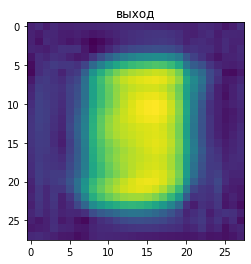

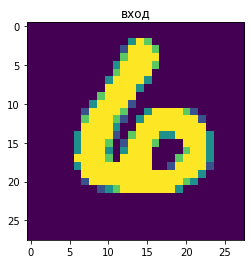

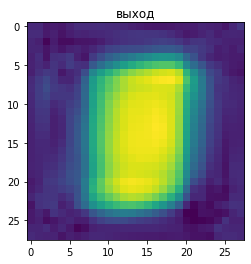

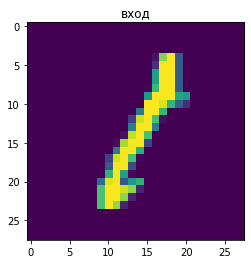

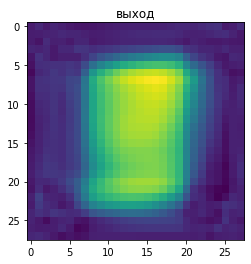

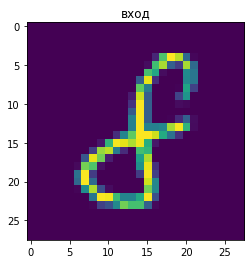

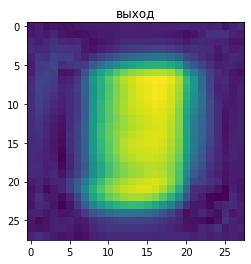

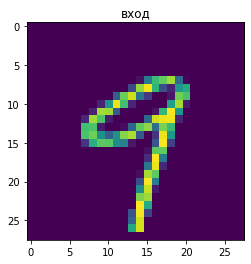

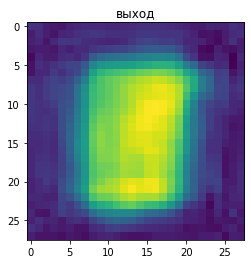

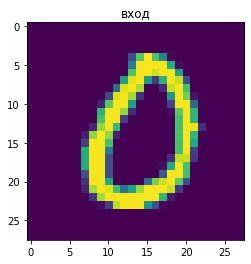

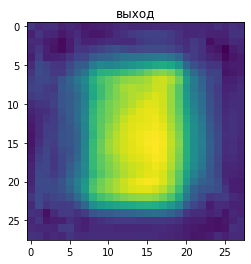

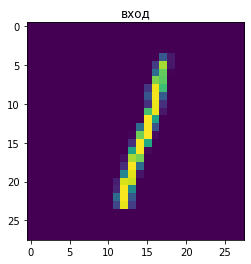

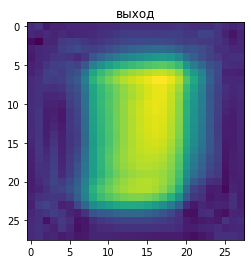

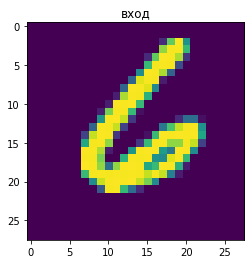

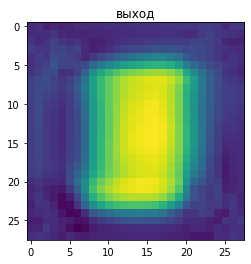

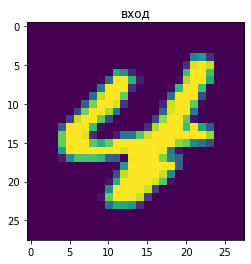

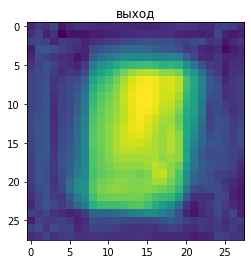

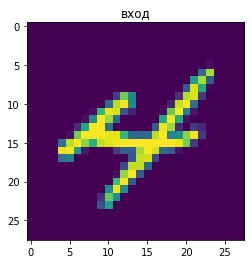

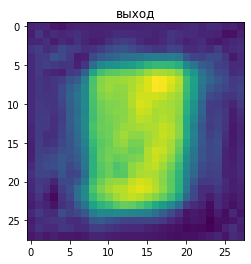

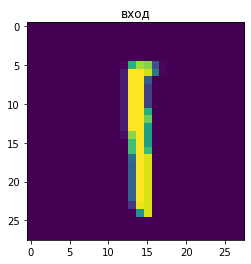

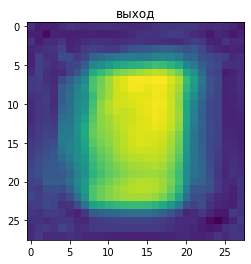

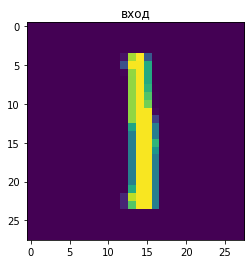

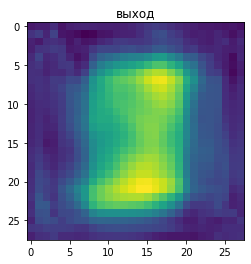

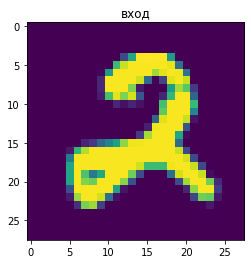

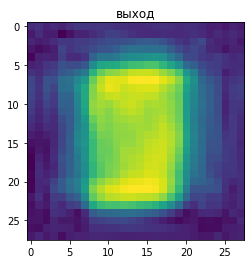

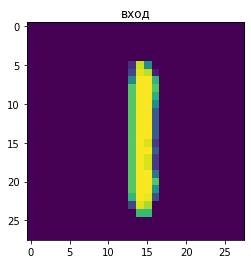

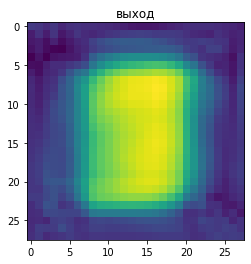

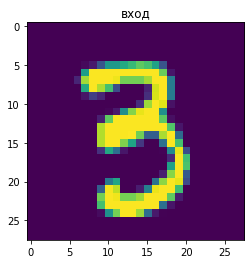

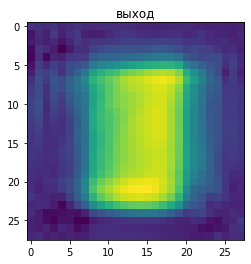

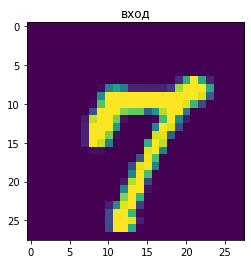

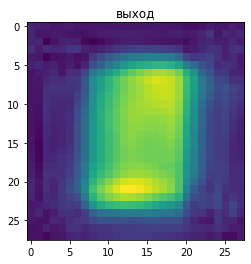

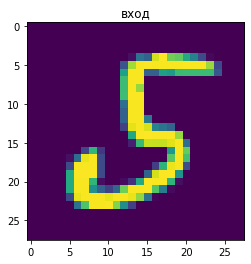

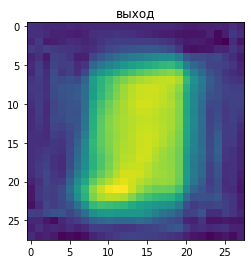

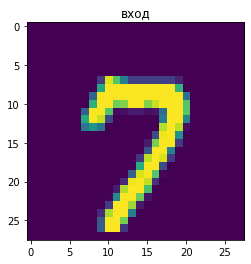

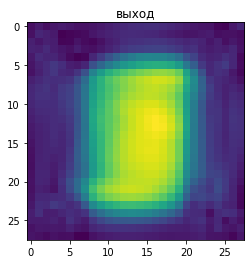

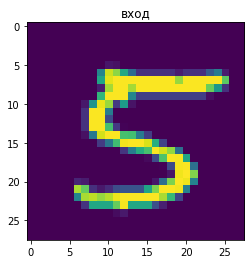

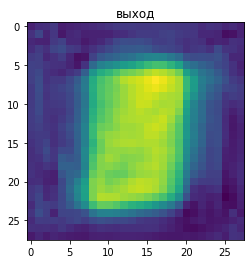

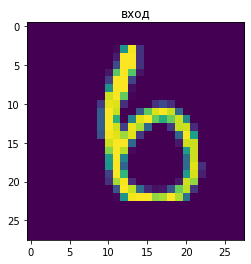

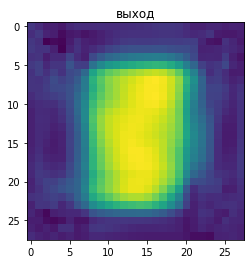

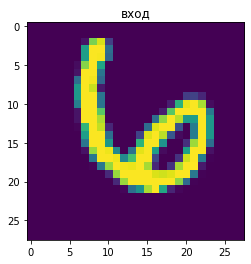

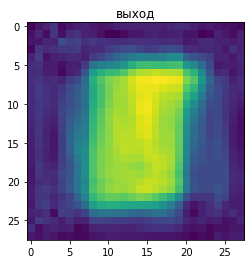

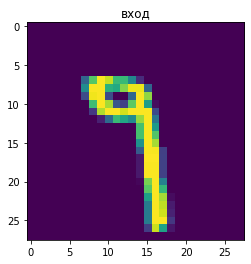

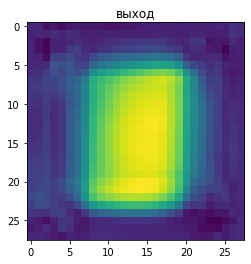

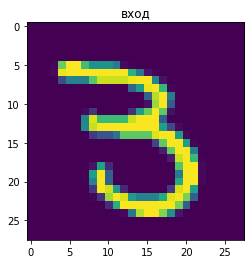

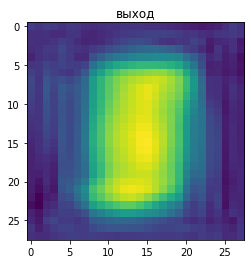

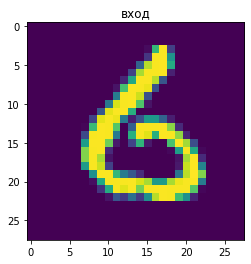

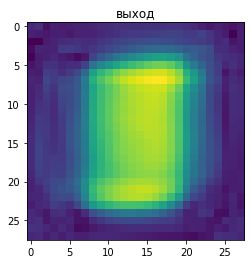

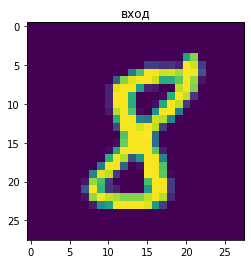

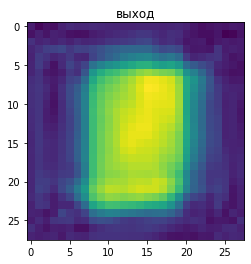

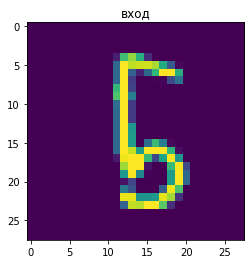

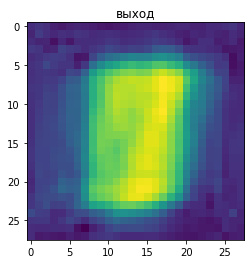

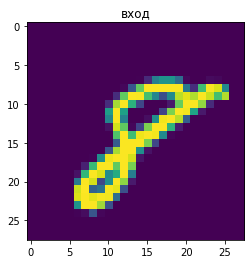

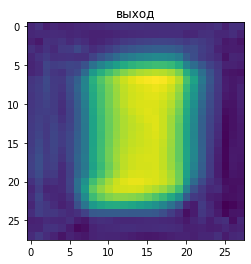

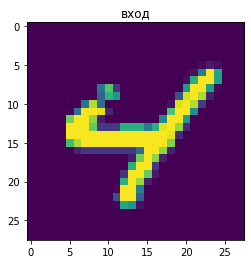

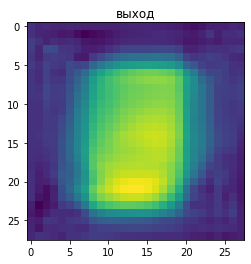

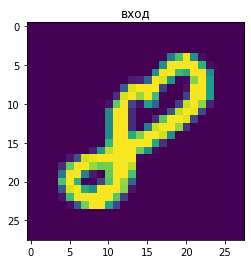

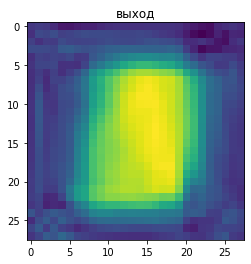

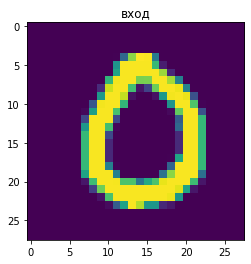

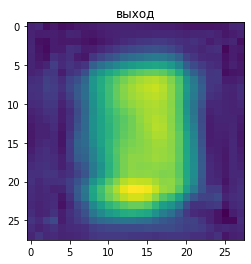

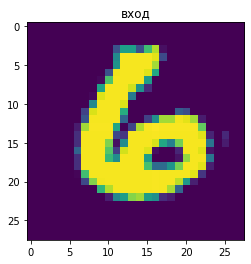

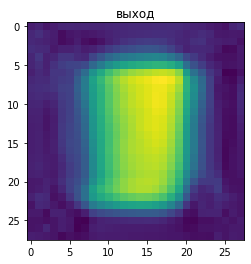

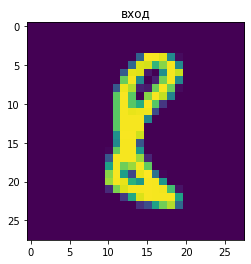

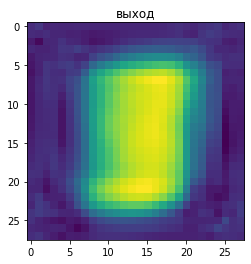

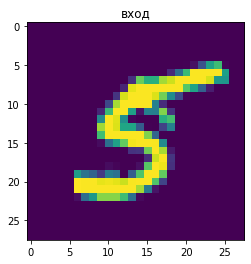

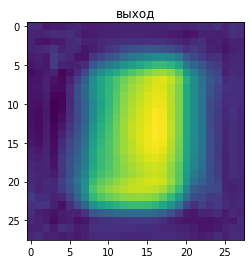

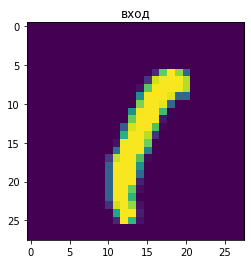

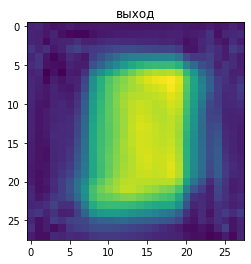

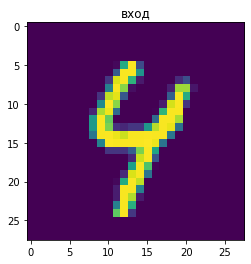

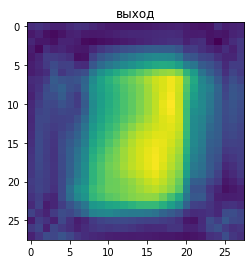

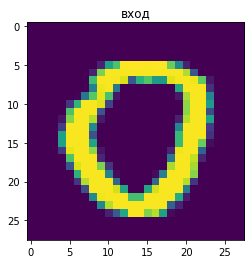

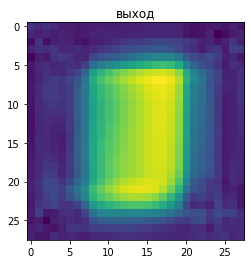

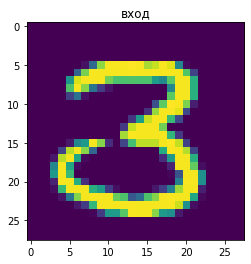

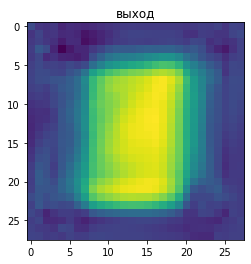

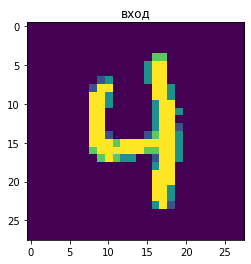

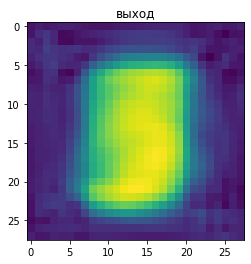

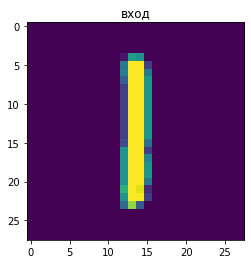

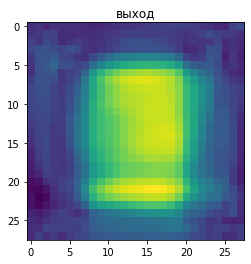

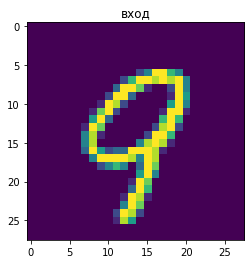

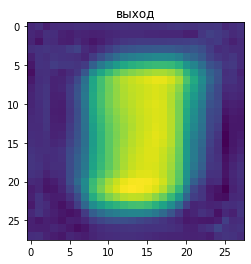

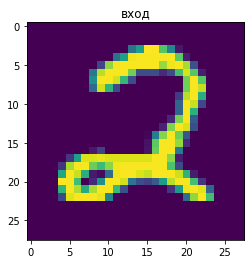

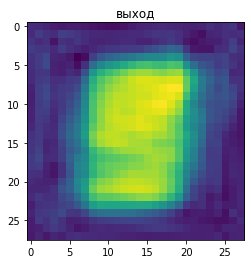

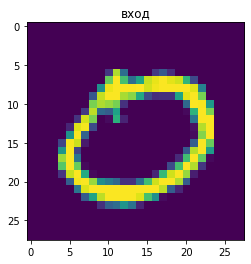

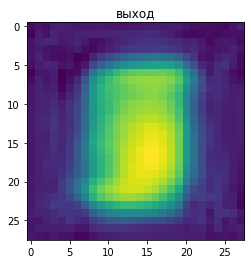

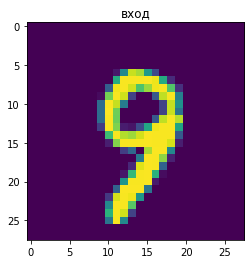

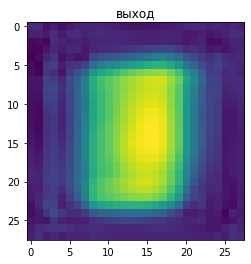

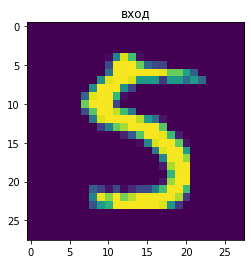

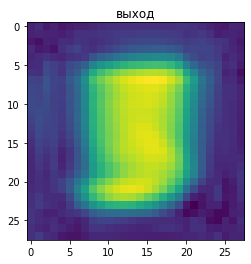

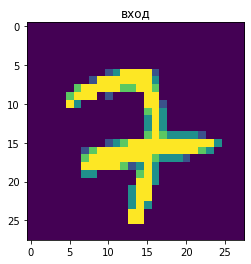

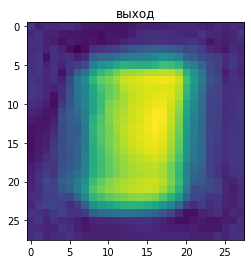

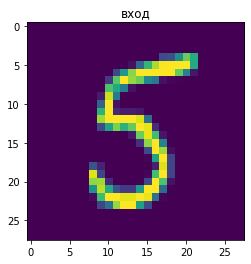

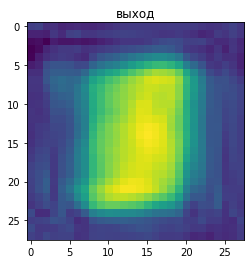

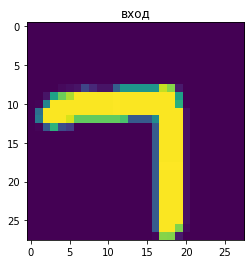

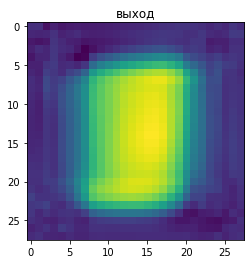

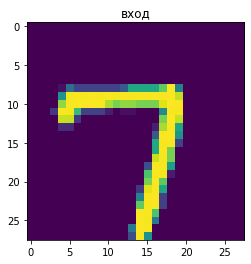

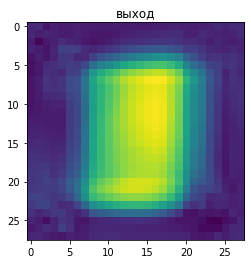

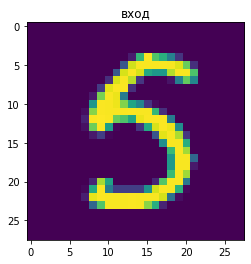

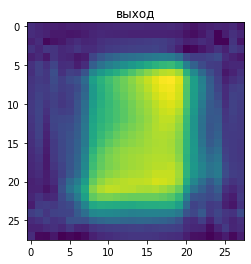

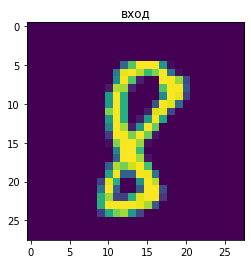

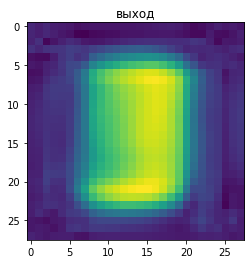

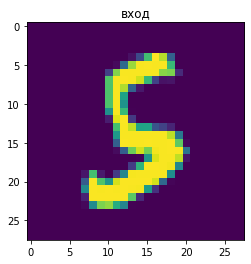

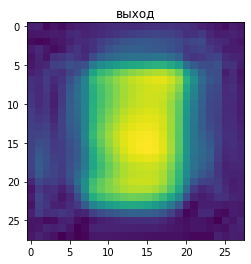

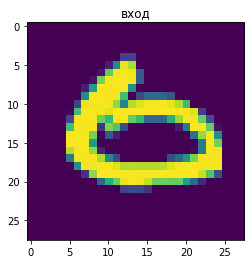

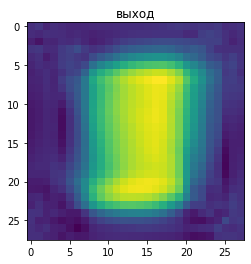

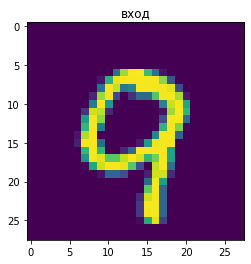

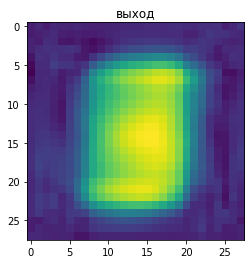

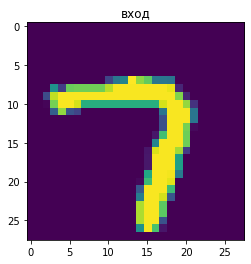

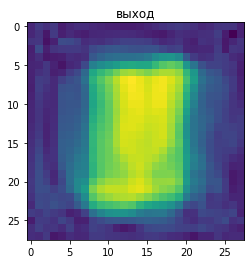

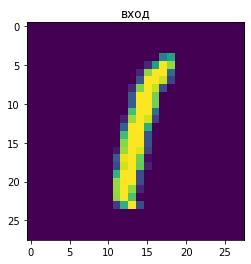

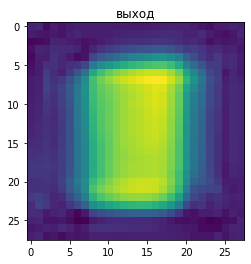

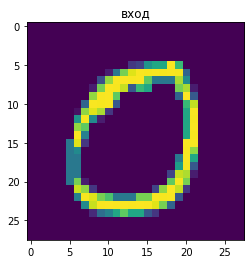

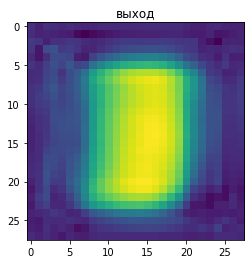

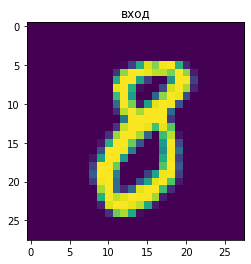

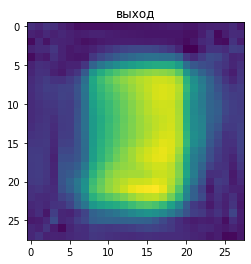

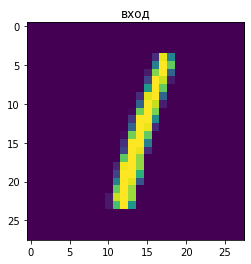

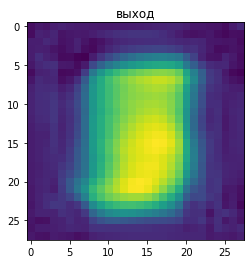

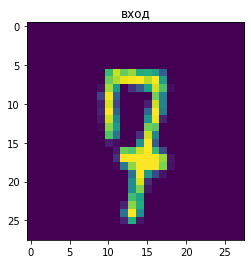

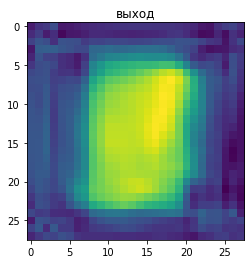

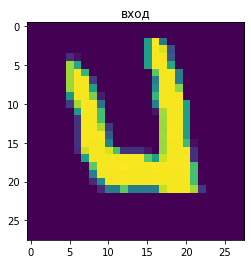

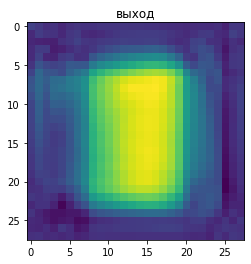

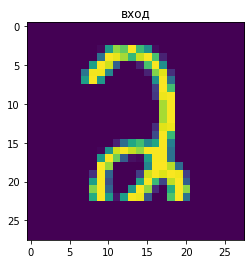

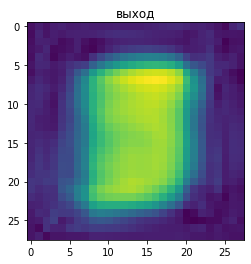

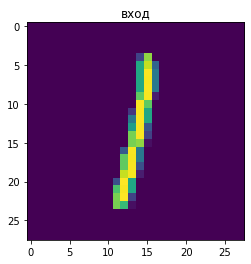

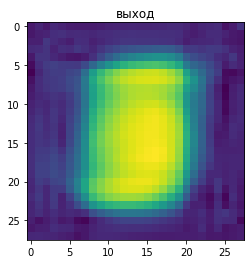

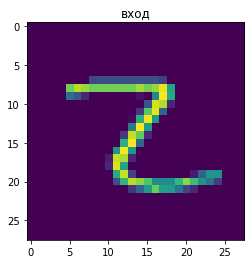

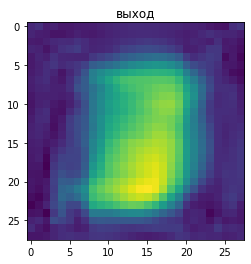

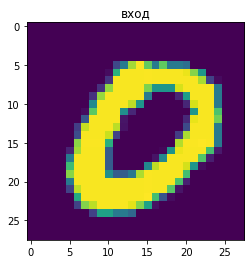

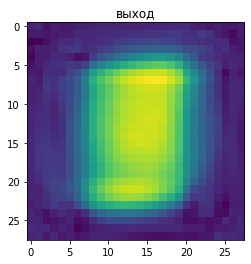

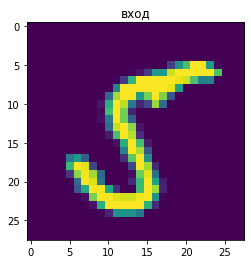

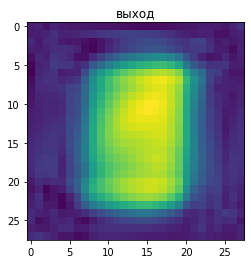

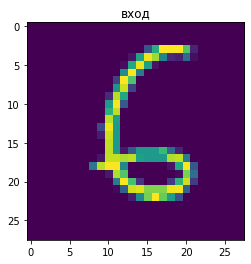

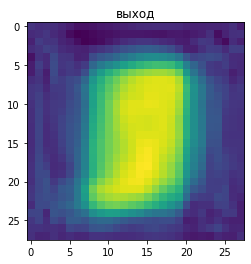

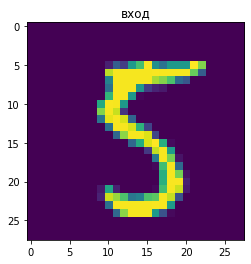

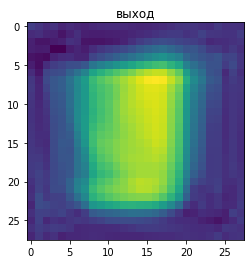

In [ ]:
import numpy as np
from scipy.stats import norm
#mean = np.array([0.5, 0.5, 0.5])
#std = np.array([0.5, 0.5, 0.5])
def show_input(input_tensor, title=''):
    image = (input_tensor*std+mean).detach().numpy()
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()
    plt.pause(0.001)
Set.eval()
'''
grid_x=[norm.ppf(np.linspace(0.5,0.6,1)) for _ in range(256)]
z_sample=np.array(grid_x).reshape(1,256)
z_torch=torch.from_numpy(z_sample).type(torch.FloatTensor)
z_decode=Set.decoder(z_torch).view(3,28,28)
#print(z_decode.size())
show_input(z_decode, title='не знаю что это')
print(z_decode[0].size())

'''







X_batch, y_batch = next(iter(train_dataloader))
for i in  X_batch:
 Y=Set.forward(i.unsqueeze(0))[0]
 show_input(i.view(28,28), title='вход')
 show_input(Y.view(28,28), title='выход')






Сохранение модели

In [ ]:
torch.save(Set.state_dict(), 'VAE10.pt')

Загрузка модели

In [ ]:
Set=AftNet34()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
Set.load_state_dict(torch.load('VAE10.pt'))
Set=Set.to(device)